In [64]:
import matplotlib.pyplot as plt
import tensorflow.keras as tfk
import numpy as np
import pandas as pd
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
import tensorflow as tf
import keras as K

In [65]:
img_height = 256
img_width = 256
channels = 3
batch_size = 8
epochs = 20

In [66]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.5)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
    './dataset/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='training',
    shuffle=True)
val_set = train_datagen.flow_from_directory(
    './dataset/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='validation',
    shuffle=True)



Found 500 images belonging to 4 classes.
Found 500 images belonging to 4 classes.


In [67]:
num_class=test_set.num_classes
print(num_class)

NameError: name 'test_set' is not defined

In [68]:
num_class = train_set.num_classes
labels = train_set.class_indices.keys()
print(labels)

dict_keys(['COVID-19', 'NORMAL', 'PNEUMONIA', 'TBC'])


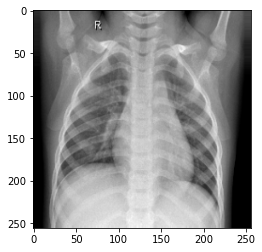

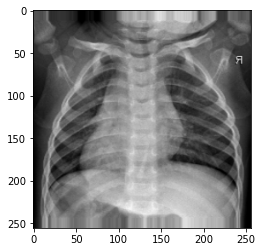

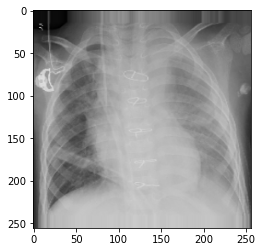

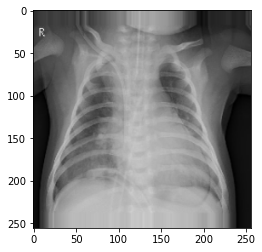

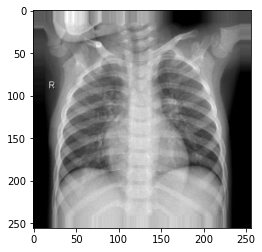

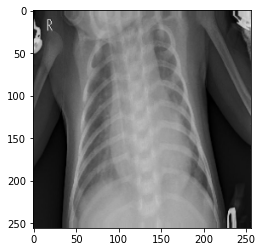

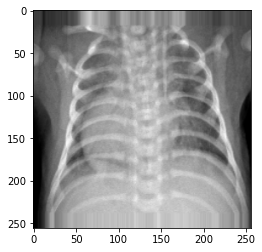

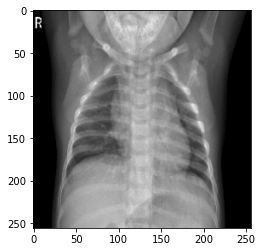

In [5]:
x,y = val_set.next()
for i in range(8):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [69]:
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model
model = VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, channels), classes=num_class)

for layer in model.layers[:-5]:
    layer.trainable = False

headModel = model.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(num_class, activation="softmax")(headModel)
model = Model(inputs=model.input, outputs=headModel)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [26]:
model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4, decay=1e-6),
                  metrics=['accuracy'])

In [32]:
history_tl = model.fit_generator(train_set,
                                 steps_per_epoch=train_set.n // batch_size,
                                 epochs=10,
                                 validation_data=val_set,
                                 validation_steps=val_set.n // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62 steps, validate for 62 steps
Epoch 1/10
62/62 [==============================] - 165s 3s/step - loss: 0.2172 - accuracy: 0.9289 - val_loss: 0.5553 - val_accuracy: 0.8710
Epoch 2/10
62/62 [==============================] - 167s 3s/step - loss: 0.1899 - accuracy: 0.9411 - val_loss: 0.3322 - val_accuracy: 0.9113
Epoch 3/10
62/62 [==============================] - 167s 3s/step - loss: 0.1930 - accuracy: 0.9350 - val_loss: 0.2288 - val_accuracy: 0.9435
Epoch 4/10
62/62 [==============================] - 168s 3s/step - loss: 0.1672 - accuracy: 0.9411 - val_loss: 0.2137 - val_accuracy: 0.9456
Epoch 5/10
62/62 [==============================] - 168s 3s/step - loss: 0.1265 - accuracy: 0.9614 - val_loss: 0.1937 - val_accuracy: 0.9355
Epoch 6/10
62/62 [==============================] - 168s 3s/step - loss: 0.1611 - accuracy: 0.9634 - val_loss: 0.1864 - val_accuracy: 0.9415
Epoch 7/10
62/62 [==============================] - 168s 3s/st

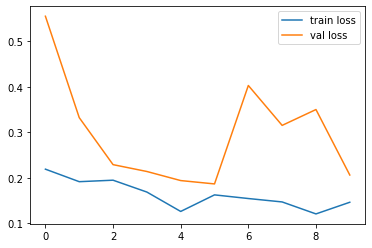

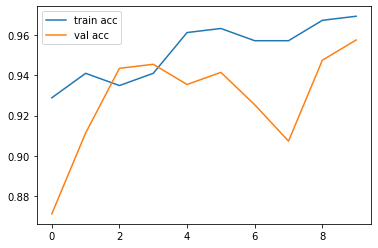

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(history_tl.history['loss'], label='train loss')
plt.plot(history_tl.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('loss_vgg195')
# plot the accuracy
plt.plot(history_tl.history['accuracy'], label='train acc')
plt.plot(history_tl.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('acc_vgg195')

In [34]:
model.save('VGG19epoch10-50%.h5')

In [70]:
from keras.models import load_model
from keras.preprocessing import image
from keras  import preprocessing
model = tf.keras.models.load_model('50%/VGG19epoch10-50%.h5')

In [71]:
labels = ['COVID-19', 'NORMAL', 'PNEUMONIA', 'TBC']
print(labels)

['COVID-19', 'NORMAL', 'PNEUMONIA', 'TBC']


Kategori : NORMAL
Akurasi  : 100.0 %


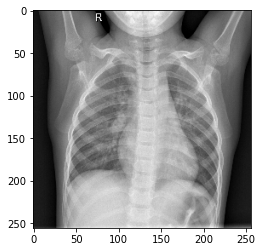

In [72]:
image_path="dataset/train/normal/IM-0115-0001.jpeg"
img = image.load_img(image_path, target_size=(256, 256))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
y = model.predict(img_data)
print('Kategori :',labels[np.argmax(y)])
print('Akurasi  :', 100*np.max(y),'%')

In [73]:
from keras import backend as K
import matplotlib.pyplot as plt
def get_class_activation_map(path) :
    
    img_path = path
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    predict = model.predict(img)
    target_class = np.argmax(predict[0])
    last_conv = model.get_layer('block5_conv4')
    grads =K.gradients(model.output[:,target_class],last_conv.output)[0]
    pooled_grads = K.mean(grads,axis=(0,1,2))
    iterate = K.function([model.input],[pooled_grads,last_conv.output[0]])
    pooled_grads_value,conv_layer_output = iterate([img])
    
    for i in range(512):
        conv_layer_output[:,:,i] *= pooled_grads_value[i]
    
    heatmap = np.mean(conv_layer_output,axis=-1)
    
    for x in range(heatmap.shape[0]):
        for y in range(heatmap.shape[1]):
            heatmap[x,y] = np.max(heatmap[x,y],0)
    heatmap = np.maximum(heatmap,0)
    heatmap /= np.max(heatmap)
    plt.imshow(heatmap)
    img_gray = cv2.cvtColor(img[0], cv2.COLOR_BGR2GRAY)
    upsample = cv2.resize(heatmap, (256,256))
   
    output_path_gradcam = 'gradcam.jpeg'
    plt.imsave(output_path_gradcam,upsample * img_gray)

C:\Users\ACER\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Users\ACER\anaconda3\envs\deeplearning\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\ACER\anaconda3\envs\deeplearning\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\ACER\anaconda3\envs\deeplearning\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\ACER\anaconda3\envs\deeplearning\lib\site-packages\matplotlib\image.py:478: UserWarning: Warning: converting a masked element to nan.
  dtype=scaled_dtype)


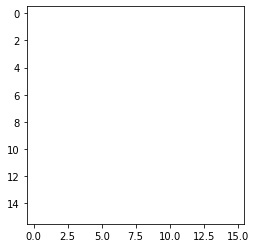

In [74]:
get_class_activation_map('dataset/train/normal/IM-0115-0001.jpeg')

In [47]:
x, y = train_set[0]
print(y.shape)  # (32, n) where n is equal to how many folder you have in 'dataset/test_set'
print(y)


(8, 4)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [31]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.5)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
    './dataset/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='training',
    shuffle=True)
val_set = train_datagen.flow_from_directory(
    './dataset/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary',
    subset='validation',
    shuffle=True)
test_set = test_datagen.flow_from_directory(
    './dataset/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle=True)

Found 20 images belonging to 4 classes.
Found 20 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [11]:
x, y = val_set[0]
print(x.shape)  # (32, n) where n is equal to how many folder you have in 'dataset/test_set'
print(x)


(8, 256, 256, 3)
[[[[0.08721612 0.08721612 0.08721612]
   [0.00199579 0.00199579 0.00199579]
   [0.         0.         0.        ]
   ...
   [0.04366858 0.04366858 0.04366858]
   [0.04538909 0.04538909 0.04538909]
   [0.04629029 0.04629029 0.04629029]]

  [[0.00620335 0.00620335 0.00620335]
   [0.00243124 0.00243124 0.00243124]
   [0.         0.         0.        ]
   ...
   [0.04403461 0.04403461 0.04403461]
   [0.04467563 0.04467563 0.04467563]
   [0.04452101 0.04452101 0.04452101]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.04313726 0.04313726 0.04313726]
   [0.04313726 0.04313726 0.04313726]
   [0.04313726 0.04313726 0.04313726]]

  ...

  [[0.03151805 0.03151805 0.03151805]
   [0.01250873 0.01250873 0.01250873]
   [0.0445819  0.0445819  0.0445819 ]
   ...
   [0.03398141 0.03398141 0.03398141]
   [0.03541725 0.03541725 0.03541725]
   [0.0371962  0.0371962  0.0371962 ]]

  [[0.02901935 0.02901935 0.